# Математическая статистика
## Практическое задание 2

В данном задании рассматриваются различные свойства оценок, методы получения оценок, способы сравнения оценок.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 2"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `2.N.ipynb` и `2.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 3 балла
* Задача 3 - 3 балла
* Задача 4 - 2 балла
* Задача 5 - 2 балла
* Задача 6 - 3 балла
* Задача 7а - 3 балла
* Задача 7b<font size="5" color="red">\*</font> - 5 баллов
* Задача 8 - 4 балла
* Задача 9<font size="5" color="red">\*</font> - 4 балла
* Задача 10<font size="5" color="red">\*</font> - 5 баллов


При выполнении задания рекомендуется пользоваться библиотекой `scipy.stats`. Подробное описание есть в наших инструкциях.

**Задача 1.** В этой задаче нужно визуализировать свойство несмещенности.

Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что в качестве оценки параметра $\theta$ можно использовать следующие оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$.

**Вопрос:** Какие из этих оценок являются несмещенными?

Несмещенные оценки: $\frac{n+1}{n}X_{(n)}$, $2\overline{X}$

Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра.

Сгенерируйте 500 выборок $X_1^j, ..., X_n^j$ из распределения $U[0, 1]$, по каждой из них посчитайте оценку $\widehat{\theta}_j$, получив тем самым 500 независимых оценок параметра. Нанесите их на график с одинаковой *у*-координатой. Отметьте специальным символом среднее этих выборок (см. шаблон ниже). Выполните данную процедуру для $n \in \{10, 100, 500\}$.

Для нанесения точек на график используйте следующий шаблон. Для каждой оценки выставите разный *уровень*, чтобы реализации разных оценок не слипались. В качестве *метки* используйте latex-код этой оценки, который можно взять выше в условии этой задачи. Постарайтесь не размножать код, а сделать циклы по типам оценок и по размеру выборки. Естественно, все типы оценок должны быть на одном графике, но для разных $n$ должны быть разные графики.

In [380]:
import numpy as np
import math
import random
import scipy.stats as sps
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.nonparametric.kde import KDEUnivariate
from sklearn.neighbors import KernelDensity
%matplotlib inline

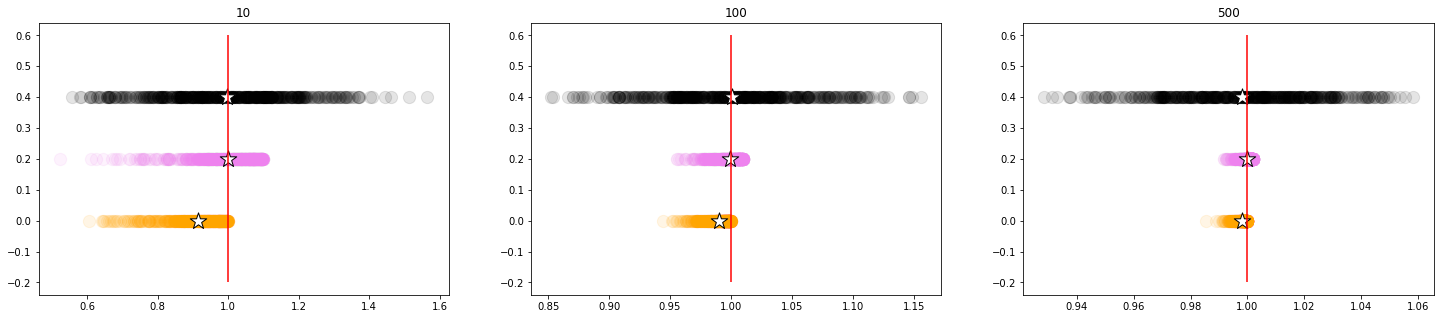

In [384]:
def appr1(sample: np.array):
    n = sample.max()
    return n

def appr2(sample):
    n = sample.size
    res = sample.max() * (n + 1) / n
    return res

def appr3(sample):
    res = 2* sample.mean()
    return res

uniform = sps.uniform(loc=0, scale=1).rvs

delta = 0.2
s_n = 500

f, axes = plt.subplots(1, 3, figsize=(25, 5), sharey=False)
colors = ['orange', 'violet', 'black']

for (i, cnt) in enumerate([10, 100, 500]):
    appr_tmp_1 = np.array([appr1(uniform(cnt)) for j in range(s_n)])
    appr_tmp_2 = np.array([appr2(uniform(cnt)) for j in range(s_n)])
    appr_tmp_3 = np.array([appr3(uniform(cnt)) for j in range(s_n)])
    appr_tmp = [appr_tmp_1, appr_tmp_2, appr_tmp_3]  
    
    for (num, name) in enumerate(["1 : $X_{(n)}$","2 : $\\frac{n+1}{n}X_{(n)}$",
                                                "3 : $2\\overline{X}$"]):
        mark = appr_tmp[num]
        y_lvl = delta * (num)
        axes[i].scatter(mark, np.zeros_like(mark) + 
                        y_lvl, 
                        alpha=0.1, s=150, color=colors[num], label=name)
        
        axes[i].scatter(mark.mean(), np.zeros_like(mark.mean()) + 
                        y_lvl,
                        marker='*', s=300, 
                        color='w', edgecolors='black')

    axes[i].vlines(1, -delta, delta * 3, color='r')
    axes[i].set_title('{sample_size}'.format(sample_size=cnt))

plt.show()

Пусть теперь $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Известно, что в качестве оценки параметра $\sigma^2$ можно использовать следующие оценки $S^2, \frac{n}{n-1}S^2$.

**Вопрос:** Какие из этих оценок являются несмещенными?

Несмещенная оценка - только  $\frac{n}{n-1}S^2$


Для данной модели выполните те же действия, что и с предыдущей.

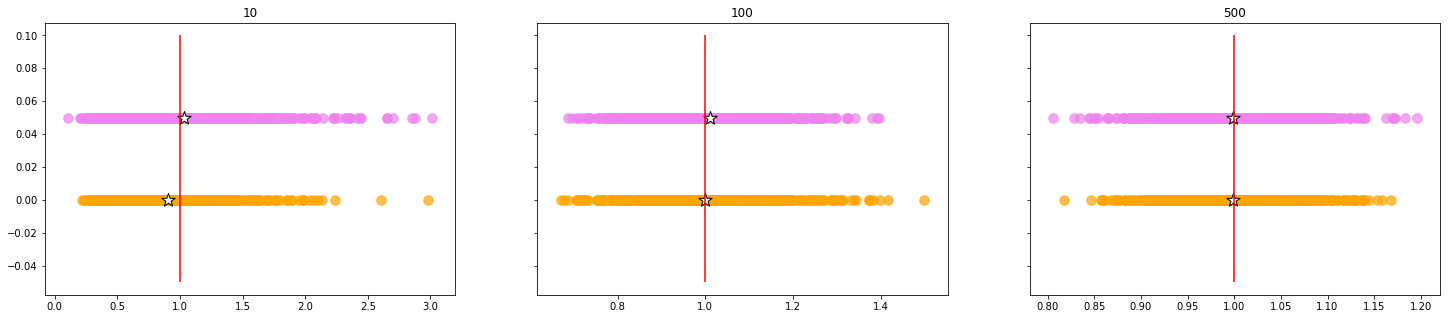

In [397]:
norm = sps.norm(loc=0, scale=1).rvs
def s_cov(s):
    return (s * s).mean() - (s.mean()) ** 2  #s == sample_num

def appr1(s):
    result = s_cov(s)
    return result

def appr2(s):
    size = s.size
    result = s_cov(s) * size / (size - 1)
    return result


delta = 0.05
s = 500

f, axes = plt.subplots(1, 3, figsize=(25, 5), sharey=True)
colors = ['orange', 'violet', 'black']

for (i, n) in enumerate([10, 100, 500]):
    appr_tmp_1 = np.array([appr1(norm(n)) for j in range(s)])
    appr_tmp_2 = np.array([appr2(norm(n)) for j in range(s)])
    appr_tmp = [appr_tmp_1, appr_tmp_2]  
    
    for (num, name) in enumerate(["1 : $S^2$", "2 : $\\frac{n}{n - 1}S^2$"]):
        appr_res = appr_tmp[num]
        
        axes[i].scatter(appr_res, np.zeros_like(appr_res) + (num) * delta, 
                        alpha=0.7, s=90, color=colors[num], label = name)
        
        axes[i].scatter(appr_res.mean(), np.zeros_like(appr_res.mean()) + (num) * delta,
                        marker='*', s=200, 
                        color='w', edgecolors='black')

    axes[i].vlines(1, -delta, 2 * delta, color='r')
    axes[i].set_title('{sample_size}'.format(sample_size=n))

    
plt.show()

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты свойство несмещенности данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

Глядя на графики можно сказать, что оценка параметра - несмещенная, если ее математическое ожидание такое же как и параметр для любого значения этого параметра.


**Задача 2.** В этой задаче нужно визуализировать свойство состоятельности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является состоятельной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. При написании кода может помочь вступительное задание.

Для каждого $j$ нанесите на один график зависимость $\widehat{\theta}_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Поскольку при малых $n$ значения оценок могут быть большими, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что $X_{(n)}$ является состоятельной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*, сгенерировав выборки из распределения $U[0, 1]$ и посчитав оценки $\widehat{\theta}_{jn} = \max\limits_{i=1...n}X_i^j$.

Сделайте вывод о том, что такое свойство состоятельности. Подтверждают ли сделанные эксперименты свойство состоятельности данных оценок? Как связаны результаты в пункте *a)* с законом больших чисел?

In [ ]:
a):

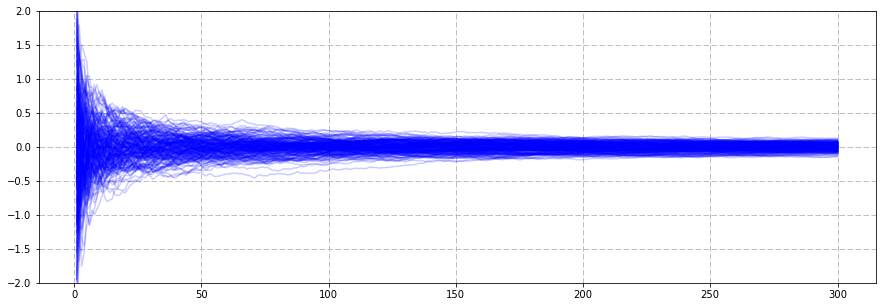

In [403]:
cnt_s = 200
num = 300
samp = sps.norm.rvs(size=(cnt_s, num))
theta_tmp = np.cumsum(samp, axis = 1) / np.arange(1, num + 1)
plt.figure(figsize=(15, 5))
for k in range(cnt_s):
    plt.plot(np.arange(1, num + 1), theta_tmp[k], alpha=0.2, color='b')
plt.grid(ls='--')
plt.ylim((-2, 2))
plt.show()

In [ ]:
b):

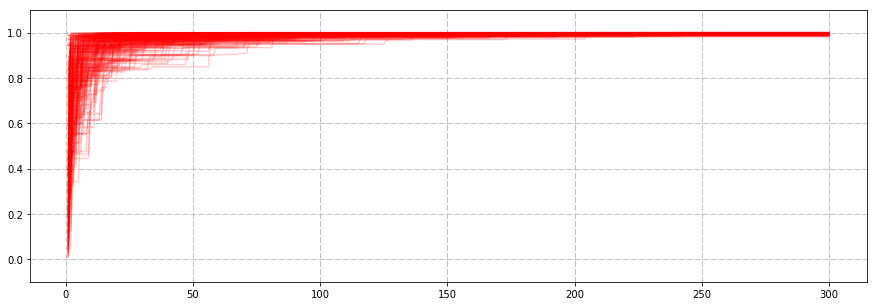

In [405]:
cnt_s = 200  # th is for theta
num = 300
samp = sps.uniform.rvs(size=(cnt_s, num))
th = np.maximum.accumulate(samp, axis=1)
plt.figure(figsize=(15, 5))
for k in range(cnt_s):
    plt.plot(np.arange(1, num + 1), th[k], alpha=0.2, color='r')
plt.grid(ls = '--')
plt.ylim((-0.1, 1.1))
plt.show()

**Вывод:** Оценка $\theta^*(X)$  - **состоятельная** для параметра $\tau(\theta)$, если для всех $\theta \in \Theta $ верноЭ, что  $\theta^*(X) \xrightarrow{{\sf P}_\theta } \tau(\theta)$. Это же подтверждается графиками: при увеличении числа элементов выборки разность $| \theta^*(X) - \theta | \rightarrow 0$

Оценка из первого пункта - состоятельная по Закону больших чисел;
при $\delta = \frac{1}{2}$ получаем $\overline{X} \xrightarrow{{\sf P}} 0$

**Задача 3.** В этой задаче нужно визуализировать свойство асимптотической нормальности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. Для этой оценки посчитайте статистику $T_{jn} = \sqrt{n} \left( \widehat{\theta}_{jn} - \theta \right)$, где $\theta = 0$.

Для каждого $j$ нанесите на один график зависимость $T_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Сходятся ли значения $T_{jn}$ к какой-либо константе?

Для $n=300$ по выборке $T_{1,300}, ..., T_{200,300}$ постройте гистограмму и ядерную оценку плотности. Хорошо ли они приближают плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Pois(\theta)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*.

Сделайте вывод о том, что такое свойство асимптотической нормальности. Подтверждают ли сделанные эксперименты свойство асимптотической нормальности данных оценок? Как связаны результаты с центральной предельной теоремой?

а):

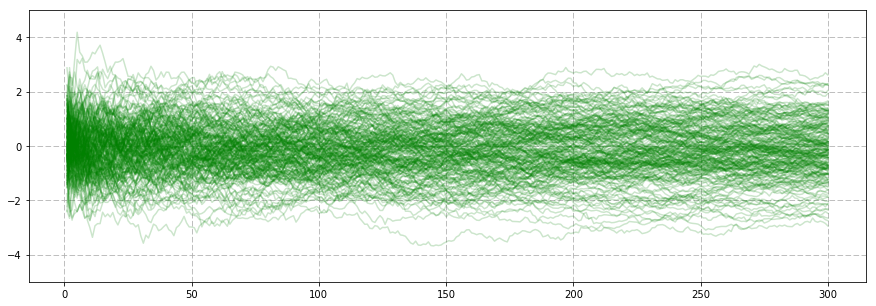

In [406]:
num = 300
cnt_s = 200
theta = 0
samp = sps.norm.rvs(size=(cnt_s, num))
theta_tmp = np.cumsum(samp, axis = 1) / np.arange(1, num + 1)
T_tmp = np.sqrt(np.arange(1, num + 1)) * (theta_tmp - theta)
plt.figure(figsize=(15, 5))
for k in range(cnt_s):
    plt.plot(np.arange(1, num + 1), T_tmp[k], alpha=0.2, color='g')
plt.ylim((-5, 5))
plt.grid(ls='--')
plt.show()

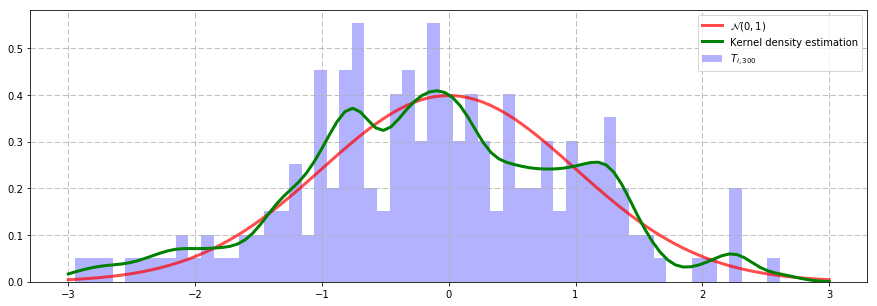

In [414]:
x = np.linspace(-3, 3, 100)
delta = 0.1
T_s = T_tmp[:, -1]
kernel_density = KernelDensity(kernel='gaussian', bandwidth=0.15)
kernel_density.fit(T_s[:, np.newaxis])
plt.figure(figsize=(15, 5))
plt.hist(T_s, bins=56, normed=True, alpha=0.3, color='b', label='$T_{i,300}$')
plt.plot(x, sps.norm.pdf(x), color='r', linewidth=3, alpha=0.7, label='$\\mathcal{N}(0, 1)$',)
plt.plot(x, np.exp(kernel_density.score_samples(x[:, np.newaxis])), 
         linewidth=3, 
         color='g', 
         label='Kernel density estimation')
plt.legend()
plt.grid(ls='--')
plt.show()

б)

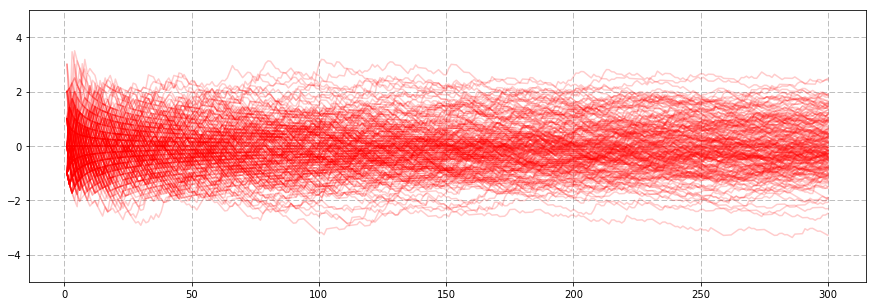

In [415]:
num = 300
cnt_s = 200
th = 1
samp = sps.poisson(mu = th).rvs(size=(cnt_s, num))
th_tmp = np.cumsum(samp, axis = 1) / np.arange(1, num + 1)
num_inc = num + 1
T_tmp = np.sqrt(np.arange(1, num_inc)) * (th_tmp - th)
plt.figure(figsize=(15, 5))
for k in range(cnt_s):
    plt.plot(np.arange(1, num_inc), T_tmp[k], alpha=0.2, color='r')
plt.ylim((-5, 5))
plt.grid(ls='--')
plt.show()

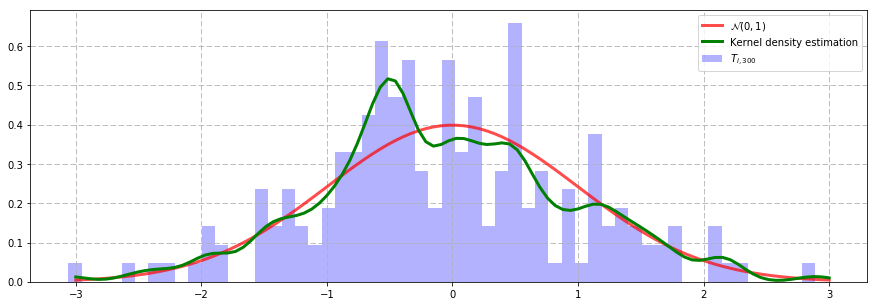

In [214]:
T_s = T_tmp[:, -1]
x = np.linspace(-3, 3, 100)
kernel_density = KernelDensity(kernel='gaussian', bandwidth=0.15)
kernel_density.fit(T_s[:, np.newaxis])
plt.figure(figsize=(15, 5))
plt.hist(T_s, bins=56, normed=True, alpha=0.3, color='b', label='$T_{i,300}$')
plt.plot(x, sps.norm.pdf(x), color='r', linewidth=3, alpha=0.7, label='$\\mathcal{N}(0, 1)$',)
plt.plot(x, np.exp(kernel_density.score_samples(x[:, np.newaxis])), linewidth=3, color='g', label='Kernel density estimation')
plt.legend()
plt.grid(ls='--')
plt.show()

**Задача 4.** Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Из домашнего задания известно, что $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$. Проведите исследование, аналогичное заданию 3 для $\theta=1$.

Пусть теперь $\theta=1$:

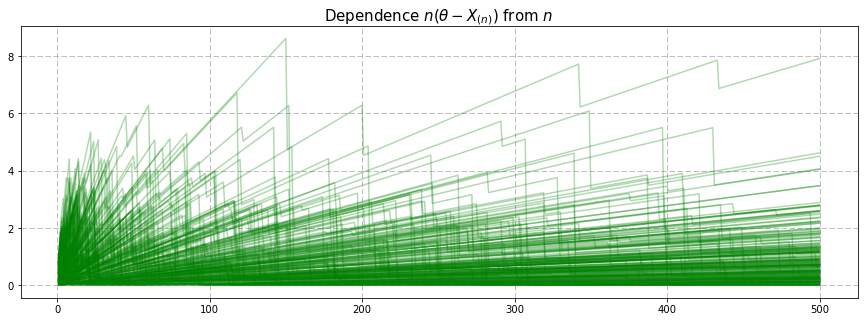

In [416]:
num = 200
size = 300

plt.figure(figsize=(15, 5))
th = 1
samp = sps.uniform.rvs(size=(num, n))
flag = 1
marks = (th - np.maximum.accumulate(samp, axis = flag)) * np.arange(1, n + 1)
for k in range(num):
    plt.plot(np.arange(flag, n + flag), marks[k], alpha=0.3, color='g')
plt.title("Dependence $n(\\theta - X_{(n)})$ from $n$", fontsize=15)
plt.grid(ls='--')
plt.show()

/home/nestyme/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


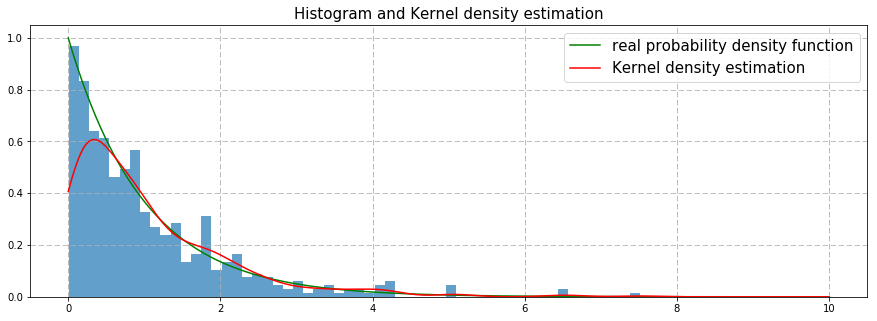

In [418]:
th = 1  # th == theta
grid = np.linspace(0, 10, 1000)
size = 300 # for sample
num = 500 # for sample

samp = np.array([size * (th - sps.uniform(loc=0, scale=th).rvs(size).max())
    for k in range(num)])
kernel_density = KDEUnivariate(samp)
kernel_density.fit()

plt.figure(figsize=(15, 5))

plt.hist(samp,
         bins=56,
         alpha = 0.7,
         normed=True)

plt.plot(grid,
         sps.expon(scale = th).pdf(grid),
         color='green', label='real probability density function')  # exponential probably

plt.plot(grid,
         kernel_density.evaluate(grid),
         color='red', label='Kernel density estimation')

plt.legend(fontsize = 15)
plt.title("Histogram and Kernel density estimation", fontsize = 15)
plt.grid(ls='--')
plt.show()

**Задача 5.** Дана параметрическая модель и несколько выборок из двух или трех наблюдений (для удобства они даются в виде python-кода). Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: [-1, 1], [-5, 5], [-1, 5]

*b).* Параметрическая модель $Exp(\theta)$, выборки: [1, 2], [0.1, 1], [1, 10]

*c).* Параметрическая модель $U[0, \theta]$, выборки: [0.2, 0.8], [0.5, 1], [0.5, 1.3]

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: [0, 1], [5, 5], [0, 5]

*e).* Параметрическая модель $Pois(\theta)$, выборки: [0, 1], [0, 10], [5, 10]

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ --- параметр сдвига, выборки: [-0.5, 0.5], [-2, 2], [-4, 0, 4]

Выполнить задание, не создавая много кода, поможет следующая функция.

In [420]:
def draw_likelihood(density_function, grid, samples, label):    
    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = density_function(sample).prod(axis=1)
        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода

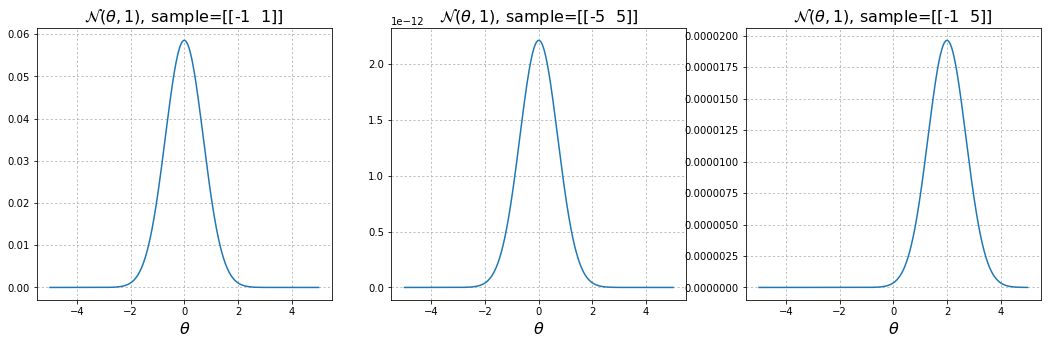

In [421]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:** Функция правдоподобия демонстрирует качество различных оценок для $\theta$ при конкретной выборке, причем, чем больше значение в точке $\theta$, тем правдоподобнее конкретный результат. Функция правдоподобия зависит только от параметра, но не зависит от выборки, то есть не является плотностью

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже

In [422]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчтета оценки максимального правдоподобия? Реализуйте это. *Подсказка:* нужно использовать некоторую функцию у класса, который реализует это распределения.

In [423]:
sample = sps.norm.rvs(size=10**5) #прологарифмируем!
likelihood = np.sum(sps.norm.logpdf(sample))
print(likelihood)

-141879.201922


**Задача 6.** 
На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Регистрируются координаты $X_i, i=1,...,n$ точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости.
Известно, что $X_i$ имеет распределение Коши.

*a).* На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

*b).* Сгенерируйте выборку размера 100 из стандартного распределения Коши. Для всех $n \leqslant 100$ по первым $n$ элементам выборки посчитайте значения $\overline{X}$ и $\widehat{\mu}$ (выборочное среднее и выборочная медиана). На одном графике изобразите зависимость значений этих оценок от $n$. Сделайте вывод.

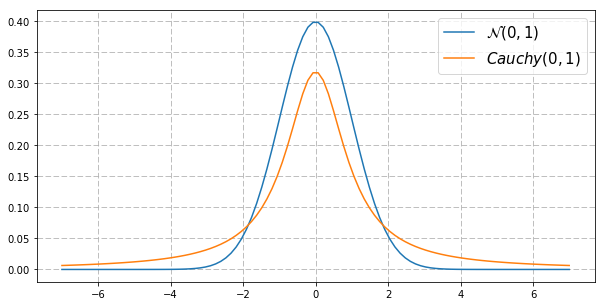

In [479]:
grid = np.linspace(-7, 7, 100)  # это пункт а
plt.figure(figsize=(10, 5))
plt.plot(grid, sps.norm.pdf(grid), label='$\\mathcal{N}(0, 1)$')
plt.plot(grid, sps.cauchy.pdf(grid), label='$Cauchy(0, 1)$')
plt.legend(fontsize=15)
plt.grid(ls='--')
plt.show()

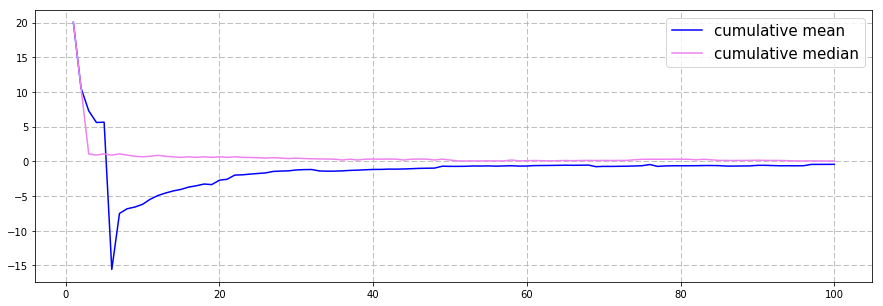

In [477]:
n = 100  # это пункт б
a = np.arange(1, n + 1)

sample = sps.cauchy.rvs(size = n)
c_means = np.cumsum(sample) / a
c_medians = np.array([np.median(sample[:i]) for i in a])

plt.figure(figsize=(15, 5))

plt.plot(a,
         c_means,
         color='blue', label='cumulative mean')

plt.plot(a,
         c_medians,
         color='violet', label='cumulative median')

plt.legend(loc='best', fontsize=15)
plt.grid(ls='--')
plt.show()

**Задача 7.** На сегодняшний день возобновляемые источники энергии становятся все более востребованными. К таким источникам относятся, например, ветрогенераторы. Однако, их мощность очень трудно прогнозировать. В частности, выработка энергии при помощи ветрогенераторы сильно зависит от скорости ветра. Поэтому предсказание скорости ветра является очень важной задачей. Скорость ветра часто моделируют с помощью распределения Вейбулла, которое имеет плотность
$$p_\theta(x) = \frac{kx^{k-1}}{\lambda^k} e^{-(x/\lambda)^k},$$
где $\theta = (k, \lambda)$ --- двумерный параметр. К сожалению, найти точную оценку максимального правдоподобия на $\theta$ не получится. В данном задании нужно найти оценку максимального правдоподобия приближенно с помощью поиска по сетке.

*Выборка.* Создайте выборку по значению скорости ветра для некоторой местности для не менее чем 100 дней. Помочь в этом может <a href="https://www.gismeteo.ru/diary/">дневник погоды</a>. Однако, данные там округлены до целого, поэтому вы можете попробовать найти другие данные.

*a).* Найдите оценку максимального правдоподобия параметра $\theta = (k, \lambda)$ с точностью $10^{-5}$ при помощи поиска по двумерной сетке.

За распределение Вейбулла отвечает класс `weibull_min` из `scipy.stats`, которое задается так: `weibull_min(c=`$k$ `, scale=`$\lambda$ `)`.

Двумерную сетку можно создать с помощью `numpy.mgrid[from:to:step, from:to:step]`. Если попробовать сразу создать сетку с шагом $10^{-5},$ то может не хватить памяти. Поэтому найдите сначала максимум по сетке с большим шагом, а потом сделайте сетку с маленьким шагом в окрестности найденной точки. При вычислении без циклов, возможно, придется создавать четырехмерные объекты.

Функция `numpy.argmax` выдает не очень информативный индекс, поэтому пользуйтесь следующей функцией.

In [428]:
def cool_argmax(array):
    return np.unravel_index(np.argmax(array), array.shape)

Нарисуйте график плотности с параметрами, соответствующим найденным ОМП, а так же нанесите на график гистограмму.

данные получены случайным генератором(мы же не метеорологи, правда?)

In [436]:
speed = [
    2.22, 3.13, 1.31, 0.48, 2.57, 2.80, 3.34, 3.16, 3.49, 2.22, 1.39, 2.54, 3.37, 2.21, 1.31, 
    1.39, 0.26, 2.42, 1.19, 2.65, 1.27, 1.98, 1.10, 1.96, 3.51, 1.73, 1.00, 2.19, 2.28, 4.57, 
    3.10, 2.40, 1.96, 2.85, 3.13, 2.86, 4.73, 3.16, 3.21, 4.66, 4.42, 1.26, 3.62, 5.86, 6.41, 
    4.14, 2.22, 2.96, 1.75, 1.55, 1.52, 1.15, 3.14, 3.66, 3.29, 3.76, 3.43, 2.95, 3.25, 0.51,
    1.00, 2.59, 3.56, 5.53, 5.20, 3.93, 1.11, 2.23, 2.21, 4.11, 1.89, 3.56, 5.78, 6.22, 3.22, 
    2.53, 1.43, 0.12, 2.24, 3.63, 4.72, 5.85, 4.44, 3.86, 4.17, 4.48, 3.52, 2.48, 1.72, 1.87, 
    2.95, 3.24, 0.72, 1.07, 1.92, 3.17, 4.44, 3.73, 1.43, 0.18, 2.54, 2.89, 0.72, 2.62, 7.35, 
    6.19, 4.77, 1.37, 4.17, 1.43, 1.65, 2.45, 1.72, 2.48, 2.83, 3.32, 2.75, 3.62, 2.42, 2.28
]

In [437]:
def grid_search(X, Y):
    bestX, bestY = cool_argmax(np.array(list(map(lambda x: np.sum(sps.weibull_min.logpdf(x = speed, 
                                                                                         c=x[0], 
                                                                                         scale=x[1])), 
                                             np.hstack([X.reshape(np.prod(X.shape), 1), 
                                                        Y.reshape(np.prod(Y.shape), 
                                                                  1)])))).reshape(X.shape))
    return (X[bestX, bestY], Y[bestX, bestY])
X, Y = np.mgrid[0.00001:np.max(speed):10e-2, 0.00001:np.max(speed):10e-2]
grid_c, grid_scale = grid_search(X, Y)

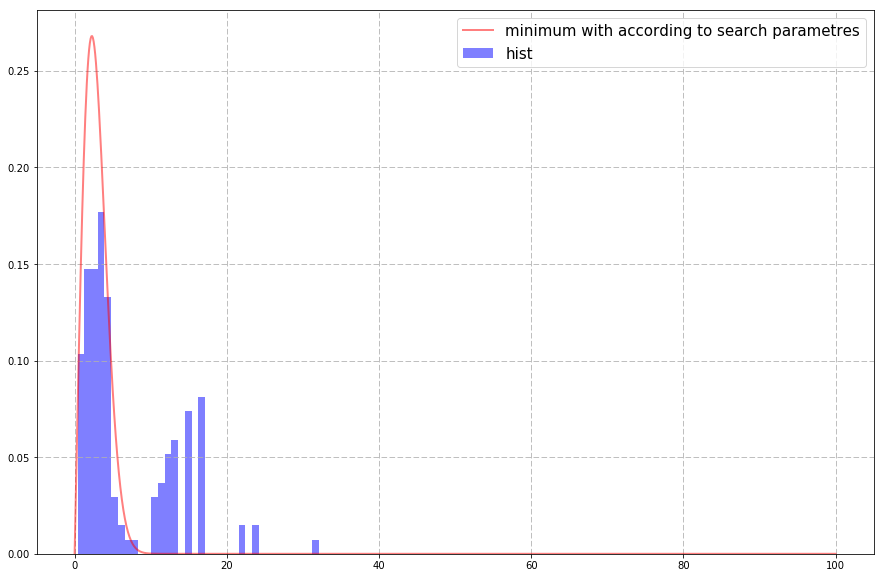

In [439]:
x = np.linspace(0, 100, 1000)
plt.figure(figsize=(15, 10))
y = sps.weibull_min(c=grid_c, scale=grid_scale).pdf(x)
plt.plot(x, y, linewidth=2, color='r', alpha=0.5, label='minimum with according to search parametres')
plt.hist(wind_speed, bins=36, normed=True, color='b', alpha=0.5, label='hist')
plt.grid(ls='--')
plt.legend(fontsize=15)
plt.show()

*b).*<font size="5" color="red">\*</font> На самом деле, при помощи дифференцирования можно перейти к задаче поиска ОМП для параметра $k$. Выполните такое преобразование и найдите ОМП приближенно с помощью метода Ньютона, основываясь на параграфе 35 книги А.А. Боровкова "Математическая статистика", 2007.

**Задача 8.** 

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом 0.01 сгенерируйте 2000 выборок $X_1^j, ..., X_{100}^j$ из распределения $U[0, \theta]$. По каждой из этих выборок посчитайте значение всех четырех оценок. Тем самым для данного $\theta$ и оценки $\theta^*$ получится 2000 реализаций этой оценки $\theta^*_1, ..., \theta^*_{2000}$, где значение $\theta^*_j$ посчитано по реализации выборки $X_1^j, ..., X_{100}^j$. Теперь можно оценить функцию потерь этой оценки с помощью усреднения
$$\widehat{R}\left(\theta^*, \theta\right) = \frac{1}{2000}\sum\limits_{j=1}^{2000} g\left(\theta^*_j, \theta\right),$$
где $g(x, y)=(x-y)^2$ и $g(x, y)=\left|x-y\right|$.

Нанесите на один график все четыре функции риска. Для каждого типа функции потерь должен быть свой график. Пользуйтесь следующим шаблоном. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

In [476]:
risk_functions = np.array([
    (lambda mark, true_value: (mark - true_value) ** 2, '$g(x, y)=(x-y)^2$', (0, 0.005)),
    (lambda mark, true_value: np.abs(mark - true_value), '$g(x, y)=\\left|x-y\\right|$', (0,
                                                                                          0.05))
])
marks = np.array([
    (lambda X, n: 2 * np.mean(X, axis=1), '$2\overline{X}$', 'b'),
    (lambda X, n: (n + 1) * np.min(X, axis=1), '$(n + 1)X_{(1)}$', 'y'),
    (lambda X, n: np.min(X, axis=1) + np.max(X, axis=1), '$X_{(1)} + X_{(n)}$', 'g'),
    (lambda X, n: (n + 1) / n * np.max(X, axis=1), '$\\frac{n + 1}{n}X_{(n)}$', 'r')
])

theta_arr = [2 - i * 0.01 for i in range(200)]

Сделайте вывод о том, какая оценка лучше и в каком подходе.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Exp(\theta)$. Для $1 \leqslant k \leqslant 5$ рассмотрим оценки $\left(k! / \overline{X^k}\right)^{1/k}$, которые вы получили в домашнем задании. Проведите исследование, аналогичное пункту *a)*. Используйте цикл по $k$, чтобы не размножать код. Факториалы есть гамма-функция, которая реализована в `scipy.special.gamma`.

**Задача 9<font size="5" color="red">\*</font>.** Пусть $\theta^*$ --- оценка параметра $\theta$ и $R\left(\theta^*, \theta\right) = \mathsf{E}_{\theta} \left(\theta^* - \theta\right)^2$ --- функция риска с квадратичной функцией потерь. Тогда справедливо bias-variance разложение
$$R\left(\theta^*, \theta\right) = bias^2(\theta^*, \theta) + variance(\theta^*, \theta) ,$$
$$bias(\theta^*, \theta) = \mathsf{E}_{\theta} \theta^* - \theta,$$
$$variance(\theta^*, \theta) = \mathsf{D}_{\theta} \theta^*.$$

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathscr{K} = \left\{cX_{(n)}, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок.

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отобажена информативная часть графика (по оси *x* примерно от 0.9 до 1.3). Не забудьте добавить сетку и легенду, а так же подписать оси.

Сделайте выводы. Какая $c$ дает минимум функции риска? Является ли соответствующая оценка смещеной? Что можно сказать про несмещенную оценку?

In [491]:
def biastheta(c, size, th):
    size_inc = size + 1
    res = c * size / (size_inc) * th - th
    return res

def vartheta(c, size, th):
    size_inc = size + 1
    return  th ** 2 * c ** 2 * size / (size_inc ** 2 * (size + 2))

...

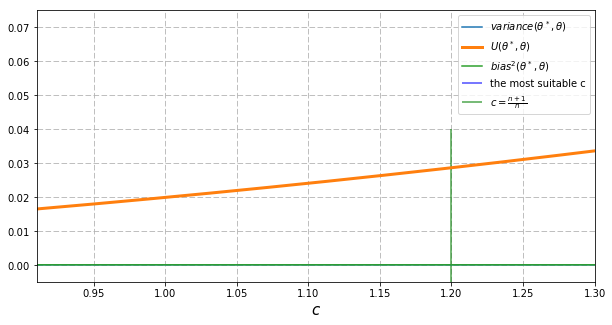

In [501]:
n = 5
th = 1
cnt = np.linspace(0, 2, 10000)
R = biastheta(cnt, n, theta)*biastheta(cnt, n, theta) + vartheta(cnt, n, th)
plt.figure(figsize=(10, 5))
plt.plot(cnt, vartheta(cnt, n, theta), label=
         '$variance(\\theta^*, \\theta)$')
plt.plot(cnt, R, label=
         '$U\\left(\\theta^*, \\theta\\right)$', linewidth = 3)
plt.plot(cnt, biastheta(cnt, n, th)*biastheta(cnt, n, theta), label=
         '$bias^2(\\theta^*, \\theta)$')
plt.vlines(c[np.argmin(R)], -0.005, 0.04, color='b', alpha=0.7, label=
           'the most suitable c')
plt.xlim((0.91, 1.3))
plt.ylim((-0.005, 0.075))
plt.xlabel('$c$', fontsize=15)
plt.vlines((n + 1)/ n, -0.005, 0.04, color='g', alpha=0.7, label='$c = \\frac{n+1}{n} $')
plt.legend(fontsize=10, loc = 1)
plt.grid(ls='--')
plt.show()

In [497]:
print("The best c for minimum risk function is:", c[np.argmin(R)])

The best c for minimum risk function is: 1.16671667167


...

**Задача 10<font size="5" color="red">\*</font>.** Разберитесь с теорией параграфа 4 главы 6 книжки М.Б. Лагутина "Наглядная математическая статистика", 2009. Проведите соответствующее исследование.